**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [6]:
df=pd.read_csv('Amazon Sale Report.csv',encoding='unicode_escape')

In [7]:
df.shape

(128976, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [9]:
##drop unrelated/blank columns
df.drop(['New','PendingS'], axis=1, inplace=True)

In [11]:
df.shape

(128976, 19)

In [12]:
#To check null values
pd.isnull(df).sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [14]:
#To drop null values
df.dropna(inplace=True)

In [16]:
df.shape

(37514, 19)

In [17]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [18]:
df['ship-postal-code']=df['ship-postal-code'].astype('int')

In [19]:
df['ship-postal-code'].dtype

dtype('int32')

In [23]:
df['Date']=pd.to_datetime(df['Date'])

In [27]:
#rename Columns
df.rename(columns={'Qty':'Quantity'})

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Quantity,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,False,Easy Ship
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,False,Easy Ship
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,False,Easy Ship
7,7,406-7807733-3785945,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1,INR,399.00,HYDERABAD,TELANGANA,500032,IN,False,Easy Ship
12,12,405-5513694-8146768,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XS,Shipped,1,INR,399.00,Amravati.,MAHARASHTRA,444606,IN,False,Easy Ship
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128875,128874,405-4724097-1016369,2022-06-01,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,S,Shipped,1,INR,854.00,ALLUR,ANDHRA PRADESH,524315,IN,False,Easy Ship
128876,128875,403-9524128-9243508,2022-06-01,Cancelled,Merchant,Amazon.in,Standard,Blazzer,XL,On the Way,0,INR,734.29,Barabanki,UTTAR PRADESH,225001,IN,False,Easy Ship
128888,128887,405-6493630-8542756,2022-05-31,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Trousers,M,Shipped,1,INR,518.00,NOIDA,UTTAR PRADESH,201301,IN,False,Easy Ship
128891,128890,407-0116398-1810752,2022-05-31,Cancelled,Merchant,Amazon.in,Standard,Wallet,Free,On the Way,0,INR,398.10,MADURAI,TAMIL NADU,625007,IN,False,Easy Ship


Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [29]:
df.describe(include='object')

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country,fulfilled-by
count,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514
unique,34664,11,1,1,1,8,11,3,1,4698,58,1,1
top,171-5057375-2831560,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN,Easy Ship
freq,12,28741,37514,37514,37514,14062,6806,31859,37514,2839,6236,37514,37514


In [30]:
df[['Qty','Amount']].describe()

,Qty,Amount
count,37514.000000,37514.000000
mean,0.867383,646.553960
std,0.354160,279.952414
min,0.000000,0.000000
25%,1.000000,458.000000
50%,1.000000,629.000000
75%,1.000000,771.000000
max,5.000000,5495.000000


**Exploratory Data Analysis**

In [31]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

<Axes: xlabel='Size', ylabel='count'>

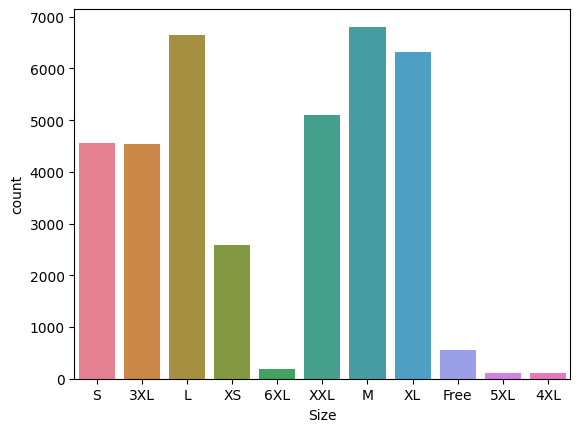

In [33]:
sns.countplot(x='Size',data=df, hue='Size')

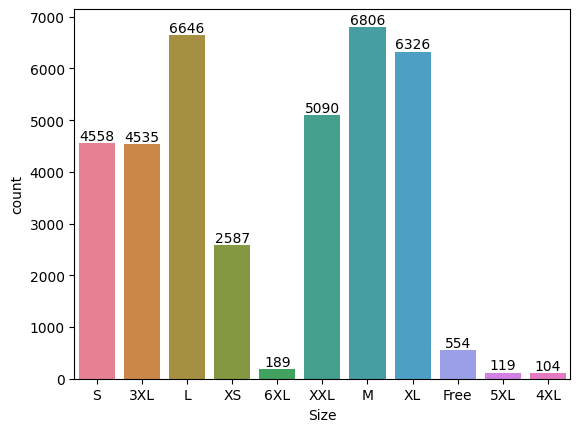

In [34]:
ax=sns.countplot(x='Size',data=df, hue='Size')
for bars in ax.containers:
    ax.bar_label(bars)

> From above Graph we can see that most of the people buys M-Size

In [37]:
df.groupby(['Size'], as_index=False)['Qty'].sum().sort_values(by='Qty', ascending=False)

,Size,Qty
6,M,5905
5,L,5795
8,XL,5481
10,XXL,4465
0,3XL,3972
7,S,3896
9,XS,2191
4,Free,467
3,6XL,170
2,5XL,104


<Axes: xlabel='Size', ylabel='Qty'>

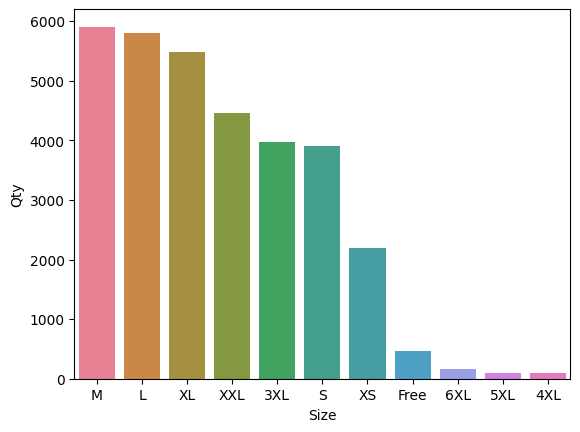

In [39]:
Size_Qty=df.groupby(['Size'], as_index=False)['Qty'].sum().sort_values(by='Qty', ascending=False)
sns.barplot(x='Size', y='Qty', data=Size_Qty, hue='Size')

> From above Graph we can see that most of the Quantity buys M-Size in the sales

Courier Status

<Axes: xlabel='Courier Status', ylabel='count'>

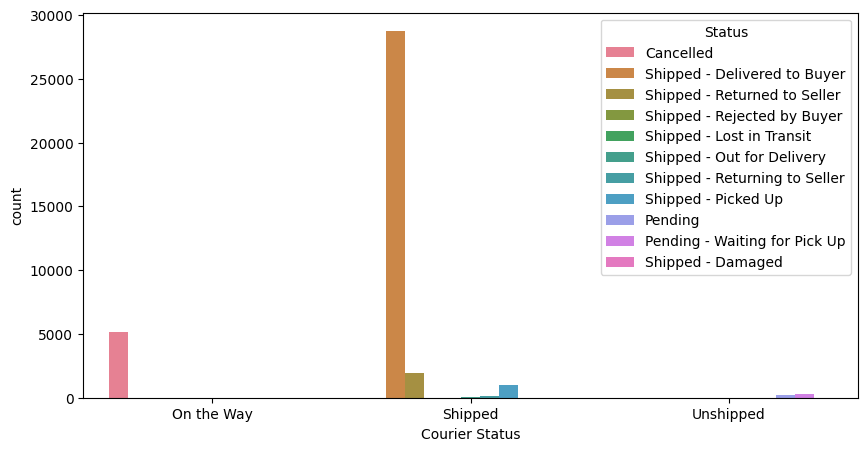

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Courier Status',hue= 'Status')

> From above Graph the majority of the orders courier status are shipped. 

Category

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'T-shirt'),
  Text(1, 0, 'Shirt'),
  Text(2, 0, 'Blazzer'),
  Text(3, 0, 'Socks'),
  Text(4, 0, 'Trousers'),
  Text(5, 0, 'Wallet'),
  Text(6, 0, 'Perfume'),
  Text(7, 0, 'Shoes')])

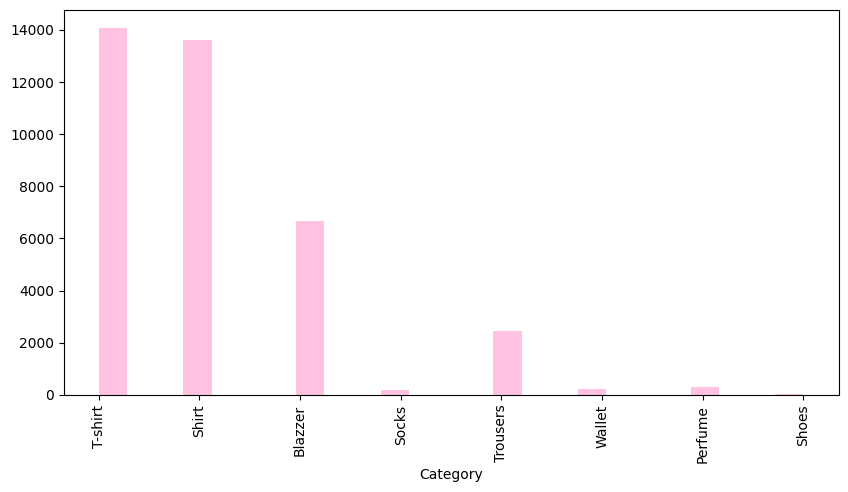

In [65]:
df['Category']=df['Category'].astype('str')
column_cat=df['Category']
plt.figure(figsize=(10,5))
plt.hist(x= column_cat, bins=25,color='hotpink', alpha=0.4)
plt.xlabel('Category')
plt.xticks(rotation=90)


<Axes: xlabel='Category', ylabel='Amount'>

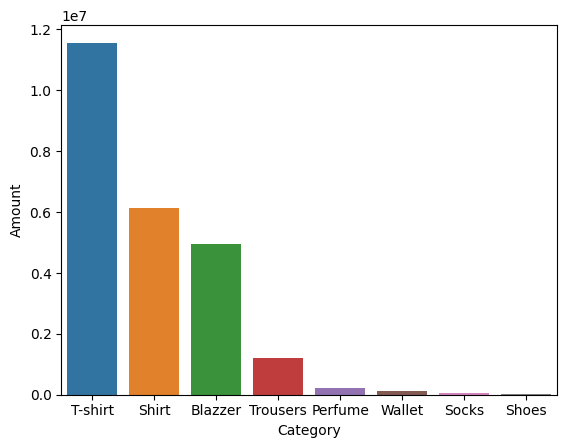

In [69]:
Cat_Amount=df.groupby(['Category'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(data=Cat_Amount,x='Category',y='Amount',hue='Category')

> From above Graph we can see that most of the buyers prefers to buy T-shirt.

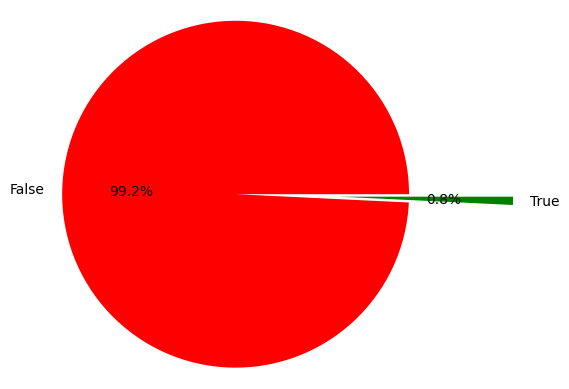

In [87]:
# Checking B2B Data  by using pie chart 
B2B_Check = df['B2B'].value_counts()
#  Plot the pie chart
plt.pie(B2B_Check, labels=B2B_Check.index, autopct='%1.1f%%', explode=[0,0.6], colors=['r','g'])
plt.axis('equal')
plt.show()


> From above chart we can see that  99.3% of the buyers are retailers and 0.7% are B2B buyers.

Text(0, 0.5, 'Size')

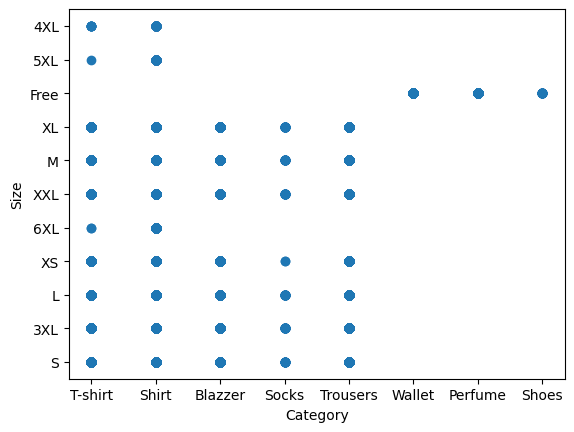

In [92]:
x_data=df['Category']
y_data=df['Size']
# Plot the scatter plot
plt.scatter(x=x_data, y=y_data)
plt.xlabel('Category')
plt.ylabel('Size')

> From the above scatter graph, we can easily get the data on the product categories and its available sizes.

Ship-State

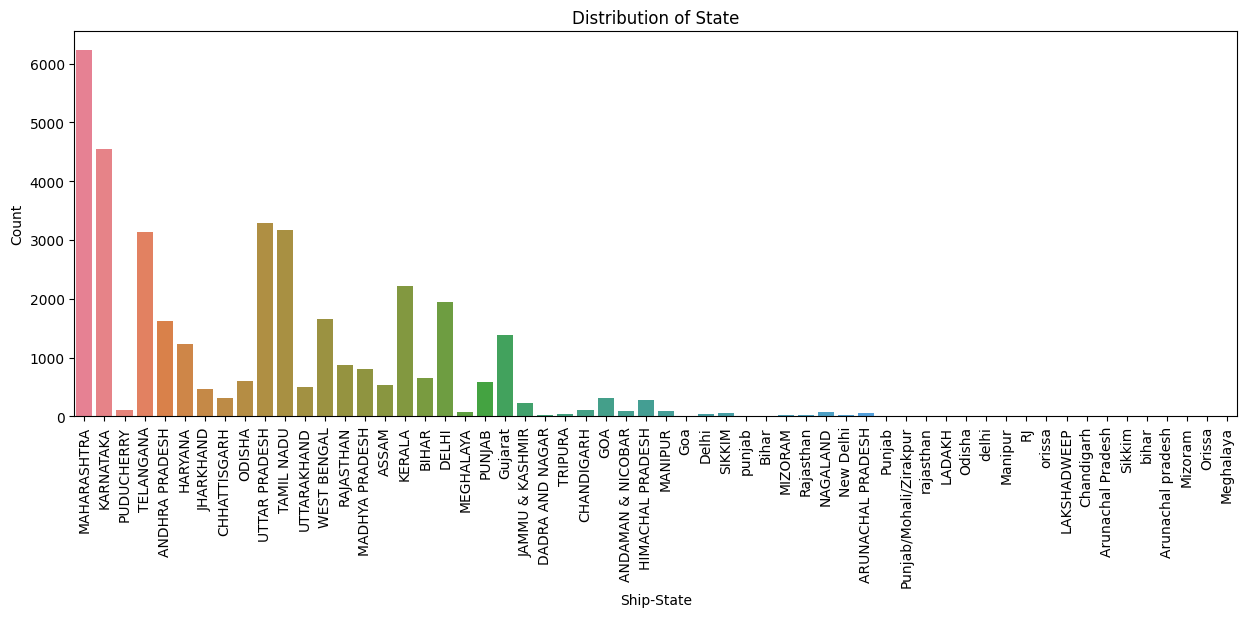

In [99]:
plt.figure(figsize=(15,5))
sns.countplot(x='ship-state', data=df, hue='ship-state')
plt.xlabel('Ship-State')
plt.ylabel('Count')
plt.title('Distribution of State')
plt.xticks(rotation=90)
plt.show()


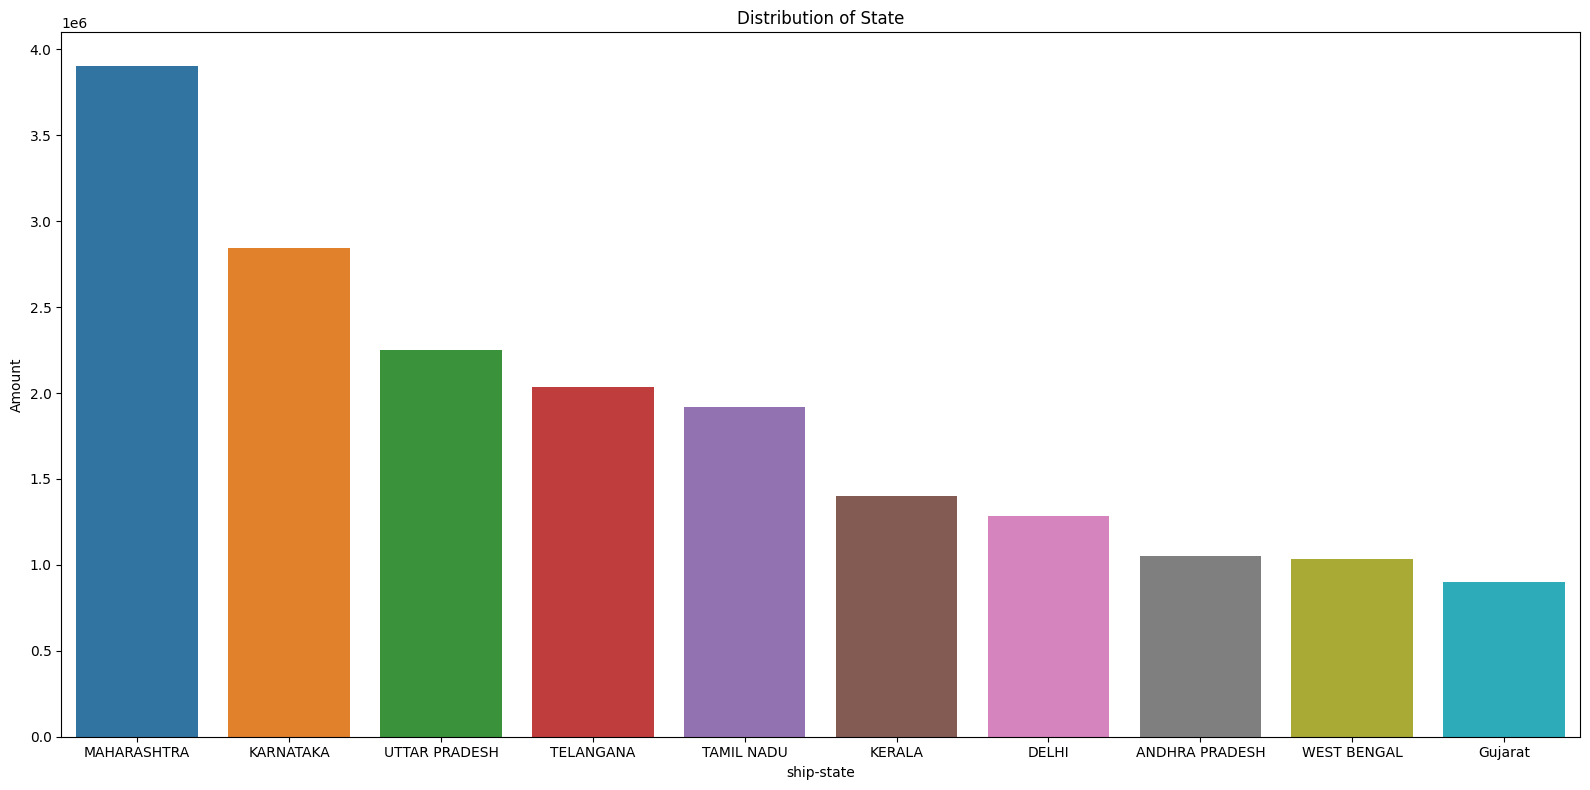

In [109]:
states_amt=df.groupby(['ship-state'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
plt.figure(figsize=(16,8))
sns.barplot(x='ship-state', y='Amount', data=states_amt, hue='ship-state')
plt.title('Distribution of State')
plt.tight_layout()
plt.show()

> From above Graph you can see that most of the buyers are from Maharashtra state.

**Conclusion:**              
The data analysis reveals that the business has a significant customer base in Maharashtra state, mainly serves retailers,majority of the orders courier status are shipped, experiences high demand for T-shirts, and sees M-Size as the preferred choice among buyers.